<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Petites_experiences_avec_la_convolution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter)
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Petites expériences le sous-échantillonnage

Vous allez expérimenter l'application du sous-échantillonnage par le maximum pour réduire la taille des représentations en sortie d'une couche convolutive. Dans un premier temps sur des représentations synthétiques puis sur une image de chevreuil faisant partie du jeu de données CIFAR-10.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sous_echantillonnage(image):
    filtre = np.array([[1,1],[1,1]])
    representation = np.zeros([image.shape[0]//2,
                               image.shape[1]//2])
    # Balayage de l'image
    for ligne in range(0,image.shape[0]-1,2):
        for col in range(0,image.shape[1]-1,2):
            # Calcul du sous-échantillon par le maximum
            zone_a_reduire = image[ligne:ligne+2,col:col+2]*filtre
            representation[ligne//2, col//2] = np.max(zone_a_reduire)
    return representation

Représentation originale:
Matrice:
 [[1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]] 

Image:


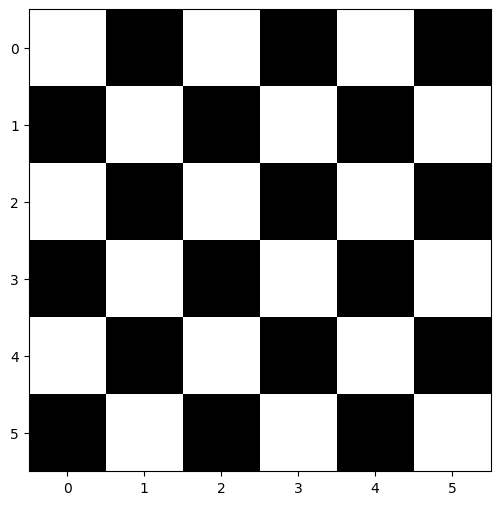


Résultat du sous-échantillonnage:
Matrice:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

Image:


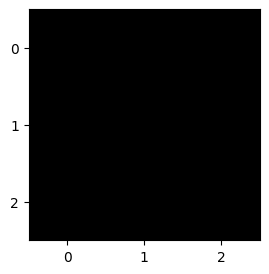

In [14]:
# Représentaion synthétique d'un damier
image = np.array([[1,0,1,0,1,0],
                  [0,1,0,1,0,1],
                  [1,0,1,0,1,0],
                  [0,1,0,1,0,1],
                  [1,0,1,0,1,0],
                  [0,1,0,1,0,1]
                 ])

print("Représentation originale:")
print("Matrice:\n",image,"\n")
print("Image:")
plt.figure(figsize=(6,6))
plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

resultat_sousEchantillon = sous_echantillonnage(image)

print("\nRésultat du sous-échantillonnage:")
print("Matrice:\n",resultat_sousEchantillon,"\n")
print("Image:")
plt.figure(figsize=(3,3))
plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap='gray')
plt.show()


**Note:** Puisque, chaque fenêtre de sous-échantillonnage de 2 x 2 de notre damier régulier contient un pixel à 1. Le résultat est donc une image avec tous les pixels à 1, ce qui corrspond à un carré noir.


Représentation originale:
Matrice:
 [[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]] 

Image:


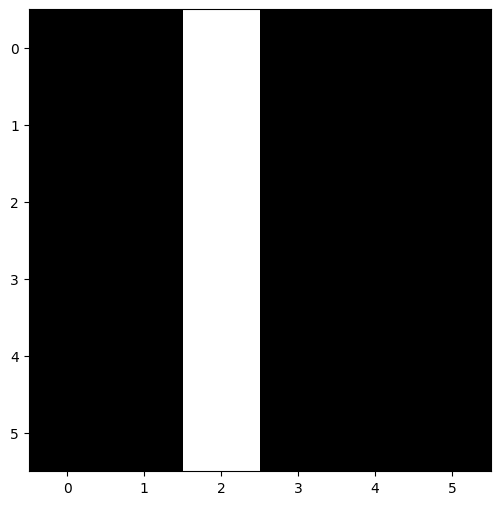


Résultat du sous-échantillonnage:
Matrice:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 

Image:


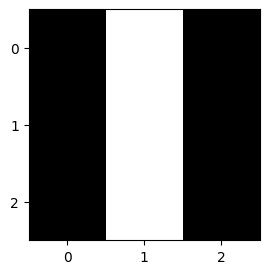

In [15]:
# Représentation synthétique comportant une ligne verticale
image = np.array([[0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0]
                 ])

print("Représentation originale:")
print("Matrice:\n",image,"\n")
print("Image:")
plt.figure(figsize=(6,6))
plt.imshow(image,cmap='gray')
plt.show()

resultat_sousEchantillon = sous_echantillonnage(image)
print("\nRésultat du sous-échantillonnage:")
print("Matrice:\n",resultat_sousEchantillon,"\n")
print("Image:")
plt.figure(figsize=(3,3))
plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap='gray')
plt.show()

**Note:** Le sous-échantillonnage a réduit la représentation par 4 tout en conservant l'attribut visuel de la ligne verticale.



## Expérience avec une photo de chevreuil en tons de gris

Image originale: (32, 32)


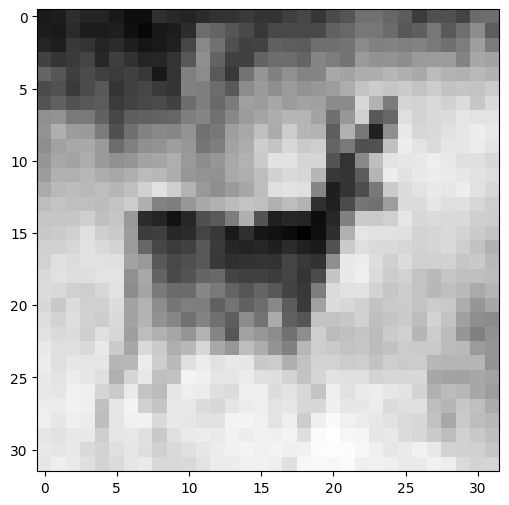


Résultat sous-échantillon: (16, 16)


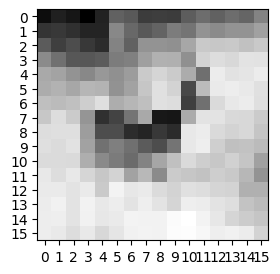

In [16]:
import urllib.request
import PIL

# chemin_data = "https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@"

chemin_data = "https://cours.edulib.org/asset-v1:Cegep-Matane+VIARENA.2+H2023+type@asset+block@"

# Image source

# image = plt.imread(chemin_data+"Chevreuil-0621_rouge-blanc_noir.png")
image = np.array(PIL.Image.open(urllib.request.urlopen(chemin_data+"Chevreuil-0621_rouge-blanc_noir.png")))

print("Image originale:",image.shape)

plt.figure(figsize=(6,6))
plt.imshow(image,cmap='gray')
plt.show()

# Sous-échantillonnage de l'image
resultat_sousEchantillon = sous_echantillonnage(image)
print("\nRésultat sous-échantillon:",resultat_sousEchantillon.shape)
plt.figure(figsize=(3,3))
plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap='gray')
plt.show()


**Note:** Le sous-échantillonnage a réduit la représentation par 4 tout en conservant les principaux attributs visuels du chevreuil.
